### Anmol Gupta

In [1]:
#conda install beautifulsoup4

### Part a 

### (i)

In [2]:
from bs4 import BeautifulSoup

In [3]:
import pandas as pd
traindata = pd.read_csv('stack_stats_2020_train.csv')
traindata.head() # to display the first 5 lines of loaded data

,Id,Score,Body,Title,Tags
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...


### Getting Text from HTML for train data

In [4]:
a=[]
for i in range(len(traindata['Body'])):
 soup = BeautifulSoup(traindata['Body'][i], 'html.parser')
 a.append((soup.get_text()))

In [5]:
print(a)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
traindata['Body']=a

In [7]:
print(traindata)

           Id  Score                                               Body  \
0      495560      1  I have a set of data that I am transforming us...   
1      489896      0  We are sending a one bit message to someone.  ...   
2      497951      2  I am aware that there is a similar post: Vecto...   
3      478542      2  I have a Poisson distributed glm where I have ...   
4      458388      0  1) how do i decide which transformation or sca...   
...       ...    ...                                                ...   
19242  464995      0  I'm currently trying to implement a decision t...   
19243  477516      0  What are the available tools (results) that ca...   
19244  461894      1  Let $X^n=(X_1,X_2,...,X_n)$ denote a sample wh...   
19245  498148      0  I have a data set of property sales where info...   
19246  469634      0  I have data from a human subject experiment wi...   

                                                   Title  \
0         R: emmeans back tranform clr 

In [8]:
b=[]
for i in traindata['Body']:
    
    b.append(i.replace("\n", ''))
    

In [9]:
print(b)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
traindata['Body']=b

### ii ) Extracting HTML text from test data

In [11]:
testdata = pd.read_csv('stack_stats_2020_test.csv')
testdata.head() # to display the first 5 lines of loaded data

,Id,Score,Body,Title,Tags
0,476132,0,<p><strong>Summarize the problem</strong></p>\...,What I do with the results extracted from lasso?,<stata><lasso>
1,450811,0,<p>I try to calculate the marginal likelihood ...,the marginal likelihood of analytical result i...,<sampling><marginal-distribution><rstan>
2,472876,1,<p>I have a data set which involves 30 binomia...,GLMER Overdispersion and Error messages,<lme4-nlme><glmm><eigenvalues><overdispersion>
3,470799,1,<p>It is well known that the K-means algorithm...,K-medoids: Is there any constraint about the c...,<clustering><k-medoids>
4,446472,2,<p>I'm working on a text classification proble...,Combining XGBoost and LightGBM,<python><boosting>


In [12]:
a=[]
for i in range(len(testdata['Body'])):
 soup = BeautifulSoup(testdata['Body'][i], 'html.parser')
 a.append((soup.get_text()))

In [13]:
testdata['Body']=a

In [14]:
b=[]
for i in testdata['Body']:
    
    b.append(i.replace("\n", ''))
    

In [15]:
testdata['Body']=b


### iii) Cleaning Tags for Training Dataset

In [16]:
b=[]
for i in traindata['Tags']:
    b.append(i.replace("<", ''))
traindata['Tags']=b  

c=[]
for i in traindata['Tags']:
    c.append(i.replace(">", ''))
traindata['Tags']=c


### iii) Cleaning Tags for Test Dataset

In [17]:
b=[]
for i in testdata['Tags']:
    b.append(i.replace("<", ''))
testdata['Tags']=b  

c=[]
for i in testdata['Tags']:
    c.append(i.replace(">", ''))
testdata['Tags']=c

### Converting text to lowercase

In [18]:
traindata['Body'] = traindata['Body'].str.lower()
traindata['Tags'] = traindata['Tags'].str.lower()
traindata['Title'] = traindata['Title'].str.lower()


In [19]:
traindata['Title']

0           r: emmeans back tranform clr data using clrinv
1        trying to determine the failure rate of redund...
2        how to derive categorical cross entropy update...
3        learning more about glm parameters, how to dig...
4        is there i guide to decide which transformatio...
                               ...                        
19242    how does decision tree classify tuple whose co...
19243    what are the available tools (results) that ca...
19244       maximum likelihood estimator for censored data
19245    can you use a single missingness indicator for...
19246    what is the appropriate non-parametric test fo...
Name: Title, Length: 19247, dtype: object

In [20]:
traindata


,Id,Score,Body,Title,Tags
0,495560,1,i have a set of data that i am transforming us...,r: emmeans back tranform clr data using clrinv,rmixed-modellinearlsmeans
1,489896,0,we are sending a one bit message to someone. ...,trying to determine the failure rate of redund...,probabilitypython
2,497951,2,i am aware that there is a similar post: vecto...,how to derive categorical cross entropy update...,logisticcross-entropy
3,478542,2,i have a poisson distributed glm where i have ...,"learning more about glm parameters, how to dig...",generalized-linear-modelinterpretation
4,458388,0,1) how do i decide which transformation or sca...,is there i guide to decide which transformatio...,pythondata-transformationdatasetfeature-engine...
...,...,...,...,...,...
19242,464995,0,i'm currently trying to implement a decision t...,how does decision tree classify tuple whose co...,classificationcart
19243,477516,0,what are the available tools (results) that ca...,what are the available tools (results) that ca...,convergenceasymptoticscentral-limit-theoremest...
19244,461894,1,"let $x^n=(x_1,x_2,...,x_n)$ denote a sample wh...",maximum likelihood estimator for censored data,estimationmaximum-likelihoodcensoring
19245,498148,0,i have a data set of property sales where info...,can you use a single missingness indicator for...,missing-datadata-preprocessingindicator-function


### Converting text to lowercase

In [21]:
testdata['Body'] = testdata['Body'].str.lower()
testdata['Tags'] = testdata['Tags'].str.lower()
testdata['Title'] = testdata['Title'].str.lower()

In [22]:
testdata['Title'] = testdata['Title'].str.lower()

In [23]:
testdata

,Id,Score,Body,Title,Tags
0,476132,0,summarize the problemi have a dataset with pan...,what i do with the results extracted from lasso?,statalasso
1,450811,0,i try to calculate the marginal likelihood of ...,the marginal likelihood of analytical result i...,samplingmarginal-distributionrstan
2,472876,1,i have a data set which involves 30 binomial a...,glmer overdispersion and error messages,lme4-nlmeglmmeigenvaluesoverdispersion
3,470799,1,it is well known that the k-means algorithm is...,k-medoids: is there any constraint about the c...,clusteringk-medoids
4,446472,2,i'm working on a text classification problem a...,combining xgboost and lightgbm,pythonboosting
...,...,...,...,...,...
8244,450701,0,"my data is of the form $(x,y)\in\mathbb{r}^{20...",visualising high dimensional data,rdata-visualizationggplot2
8245,481194,1,i noticed the term anova used in many contexts...,is the analysis of residual variance still ano...,regressionanovageneralized-linear-modelmodelin...
8246,492163,3,"i'm trying to do logistic regression, but i ca...",handling missing data in logistic regression,rregressionlogisticmissing-dataregression-stra...
8247,451444,2,consider the following experimental design wit...,mixed models: how to treat random factors that...,rmixed-modellme4-nlme


### Removing punctuation from Testing and Training data

In [24]:
from string import punctuation


def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

#note digits and punctuations are not informative for our analysis

trainbody_no_punct = traindata['Body'].apply(remove_punctuation)
trainbody_no_punct

0        i have a set of data that i am transforming us...
1        we are sending a one bit message to someone  t...
2        i am aware that there is a similar post vector...
3        i have a poisson distributed glm where i have ...
4        1 how do i decide which transformation or scal...
                               ...                        
19242    im currently trying to implement a decision tr...
19243    what are the available tools results that can ...
19244    let xnx1x2xn denote a sample where 1 ximathbf ...
19245    i have a data set of property sales where info...
19246    i have data from a human subject experiment wi...
Name: Body, Length: 19247, dtype: object

In [25]:
traintag_no_punct = traindata['Tags'].apply(remove_punctuation)
traintag_no_punct

0                                 rmixedmodellinearlsmeans
1                                        probabilitypython
2                                     logisticcrossentropy
3                     generalizedlinearmodelinterpretation
4        pythondatatransformationdatasetfeatureengineer...
                               ...                        
19242                                   classificationcart
19243    convergenceasymptoticscentrallimittheoremestim...
19244                 estimationmaximumlikelihoodcensoring
19245        missingdatadatapreprocessingindicatorfunction
19246    rmixedmodelrepeatedmeasuresnonparametricwilcox...
Name: Tags, Length: 19247, dtype: object

In [26]:
testbody_no_punct = testdata['Body'].apply(remove_punctuation)
testbody_no_punct

0       summarize the problemi have a dataset with pan...
1       i try to calculate the marginal likelihood of ...
2       i have a data set which involves 30 binomial a...
3       it is well known that the kmeans algorithm is ...
4       im working on a text classification problem an...
                              ...                        
8244    my data is of the form xyinmathbbr20timesmathb...
8245    i noticed the term anova used in many contexts...
8246    im trying to do logistic regression but i cant...
8247    consider the following experimental design wit...
8248    i am constructing different configurations of ...
Name: Body, Length: 8249, dtype: object

In [27]:
testtag_no_punct = testdata['Tags'].apply(remove_punctuation)
testtag_no_punct

0                                              statalasso
1                       samplingmarginaldistributionrstan
2                   lme4nlmeglmmeigenvaluesoverdispersion
3                                      clusteringkmedoids
4                                          pythonboosting
                              ...                        
8244                            rdatavisualizationggplot2
8245    regressionanovageneralizedlinearmodelmodelingg...
8246    rregressionlogisticmissingdataregressionstrate...
8247                                  rmixedmodellme4nlme
8248    machinelearningrandomforestspatialpartitioning...
Name: Tags, Length: 8249, dtype: object

In [28]:
testttitle_no_punct = testdata['Title'].apply(remove_punctuation)
testttitle_no_punct

0         what i do with the results extracted from lasso
1       the marginal likelihood of analytical result i...
2                 glmer overdispersion and error messages
3       kmedoids is there any constraint about the cho...
4                          combining xgboost and lightgbm
                              ...                        
8244                    visualising high dimensional data
8245    is the analysis of residual variance still ano...
8246         handling missing data in logistic regression
8247    mixed models how to treat random factors that ...
8248                   data partitioning for spatial data
Name: Title, Length: 8249, dtype: object

In [29]:
traintitle_no_punct = traindata['Title'].apply(remove_punctuation)
traintitle_no_punct

0            r emmeans back tranform clr data using clrinv
1        trying to determine the failure rate of redund...
2        how to derive categorical cross entropy update...
3        learning more about glm parameters how to dig ...
4        is there i guide to decide which transformatio...
                               ...                        
19242    how does decision tree classify tuple whose co...
19243    what are the available tools results that can ...
19244       maximum likelihood estimator for censored data
19245    can you use a single missingness indicator for...
19246    what is the appropriate nonparametric test for...
Name: Title, Length: 19247, dtype: object

### Remove Digits Test Data and Training Data

In [30]:
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

In [31]:
trainingtitle_no_digit = traintitle_no_punct.apply(remove_digit)
trainingtitle_no_digit

0            r emmeans back tranform clr data using clrinv
1        trying to determine the failure rate of redund...
2        how to derive categorical cross entropy update...
3        learning more about glm parameters how to dig ...
4        is there i guide to decide which transformatio...
                               ...                        
19242    how does decision tree classify tuple whose co...
19243    what are the available tools results that can ...
19244       maximum likelihood estimator for censored data
19245    can you use a single missingness indicator for...
19246    what is the appropriate nonparametric test for...
Name: Title, Length: 19247, dtype: object

In [32]:
testingtitle_no_digit = testttitle_no_punct.apply(remove_digit)
testingtitle_no_digit

0         what i do with the results extracted from lasso
1       the marginal likelihood of analytical result i...
2                 glmer overdispersion and error messages
3       kmedoids is there any constraint about the cho...
4                          combining xgboost and lightgbm
                              ...                        
8244                    visualising high dimensional data
8245    is the analysis of residual variance still ano...
8246         handling missing data in logistic regression
8247    mixed models how to treat random factors that ...
8248                   data partitioning for spatial data
Name: Title, Length: 8249, dtype: object

In [33]:
testingtags_no_digit = testtag_no_punct.apply(remove_digit)
testingtags_no_digit

0                                              statalasso
1                       samplingmarginaldistributionrstan
2                    lmenlmeglmmeigenvaluesoverdispersion
3                                      clusteringkmedoids
4                                          pythonboosting
                              ...                        
8244                             rdatavisualizationggplot
8245    regressionanovageneralizedlinearmodelmodelingg...
8246    rregressionlogisticmissingdataregressionstrate...
8247                                   rmixedmodellmenlme
8248    machinelearningrandomforestspatialpartitioning...
Name: Tags, Length: 8249, dtype: object

In [34]:
traintags_no_digit = traintag_no_punct.apply(remove_digit)
traintags_no_digit

0                                 rmixedmodellinearlsmeans
1                                        probabilitypython
2                                     logisticcrossentropy
3                     generalizedlinearmodelinterpretation
4        pythondatatransformationdatasetfeatureengineer...
                               ...                        
19242                                   classificationcart
19243    convergenceasymptoticscentrallimittheoremestim...
19244                 estimationmaximumlikelihoodcensoring
19245        missingdatadatapreprocessingindicatorfunction
19246    rmixedmodelrepeatedmeasuresnonparametricwilcox...
Name: Tags, Length: 19247, dtype: object

In [35]:
trainbody_no_digit = trainbody_no_punct.apply(remove_digit)
trainbody_no_digit

0        i have a set of data that i am transforming us...
1        we are sending a one bit message to someone  t...
2        i am aware that there is a similar post vector...
3        i have a poisson distributed glm where i have ...
4         how do i decide which transformation or scali...
                               ...                        
19242    im currently trying to implement a decision tr...
19243    what are the available tools results that can ...
19244    let xnxxxn denote a sample where  ximathbf eps...
19245    i have a data set of property sales where info...
19246    i have data from a human subject experiment wi...
Name: Body, Length: 19247, dtype: object

In [36]:
testbody_no_digit = testbody_no_punct.apply(remove_digit)
testbody_no_digit

0       summarize the problemi have a dataset with pan...
1       i try to calculate the marginal likelihood of ...
2       i have a data set which involves  binomial abs...
3       it is well known that the kmeans algorithm is ...
4       im working on a text classification problem an...
                              ...                        
8244    my data is of the form xyinmathbbrtimesmathbbr...
8245    i noticed the term anova used in many contexts...
8246    im trying to do logistic regression but i cant...
8247    consider the following experimental design wit...
8248    i am constructing different configurations of ...
Name: Body, Length: 8249, dtype: object

###  Tokenization 

In order to do certain word-related manipulations, we will first tokenize the text, i.e. transform the complete text string into a vector of words

#it means cut each sentence into different words

In [37]:
import nltk
from nltk.tokenize import word_tokenize

trainingtitle_tokenized = trainingtitle_no_digit.apply(word_tokenize)
trainingtitle_tokenized.head()

0    [r, emmeans, back, tranform, clr, data, using,...
1    [trying, to, determine, the, failure, rate, of...
2    [how, to, derive, categorical, cross, entropy,...
3    [learning, more, about, glm, parameters, how, ...
4    [is, there, i, guide, to, decide, which, trans...
Name: Title, dtype: object

In [38]:
trainingtags_tokenized = traintags_no_digit.apply(word_tokenize)
trainingtags_tokenized.head()

0                           [rmixedmodellinearlsmeans]
1                                  [probabilitypython]
2                               [logisticcrossentropy]
3               [generalizedlinearmodelinterpretation]
4    [pythondatatransformationdatasetfeatureenginee...
Name: Tags, dtype: object

In [39]:
trainingbody_tokenized = trainbody_no_digit.apply(word_tokenize)
trainingbody_tokenized.head()

0    [i, have, a, set, of, data, that, i, am, trans...
1    [we, are, sending, a, one, bit, message, to, s...
2    [i, am, aware, that, there, is, a, similar, po...
3    [i, have, a, poisson, distributed, glm, where,...
4    [how, do, i, decide, which, transformation, or...
Name: Body, dtype: object

In [40]:
###

In [41]:
testingtitle_tokenized = testingtitle_no_digit.apply(word_tokenize)
testingtitle_tokenized.head()

0    [what, i, do, with, the, results, extracted, f...
1    [the, marginal, likelihood, of, analytical, re...
2        [glmer, overdispersion, and, error, messages]
3    [kmedoids, is, there, any, constraint, about, ...
4                  [combining, xgboost, and, lightgbm]
Name: Title, dtype: object

In [42]:
testingtags_tokenized = testingtags_no_digit.apply(word_tokenize)
testingtags_tokenized.head()

0                              [statalasso]
1       [samplingmarginaldistributionrstan]
2    [lmenlmeglmmeigenvaluesoverdispersion]
3                      [clusteringkmedoids]
4                          [pythonboosting]
Name: Tags, dtype: object

In [43]:
testbody_tokenized = testbody_no_digit.apply(word_tokenize)
testbody_tokenized.head()

0    [summarize, the, problemi, have, a, dataset, w...
1    [i, try, to, calculate, the, marginal, likelih...
2    [i, have, a, data, set, which, involves, binom...
3    [it, is, well, known, that, the, kmeans, algor...
4    [im, working, on, a, text, classification, pro...
Name: Body, dtype: object

###  Remove Stopwords (iv)

In [44]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
#stop words can be defined and customised based on research

In [46]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [47]:
title_no_stop_training = trainingtitle_tokenized.apply(remove_stopwords)
title_no_stop_training

0        [r, emmeans, back, tranform, clr, data, using,...
1        [trying, determine, failure, rate, redundantly...
2        [derive, categorical, cross, entropy, update, ...
3                 [learning, glm, parameters, dig, deeper]
4        [guide, decide, transformation, choose, differ...
                               ...                        
19242    [decision, tree, classify, tuple, whose, combi...
19243    [available, tools, results, used, pin, rate, c...
19244     [maximum, likelihood, estimator, censored, data]
19245    [use, single, missingness, indicator, several,...
19246    [appropriate, nonparametric, test, interaction...
Name: Title, Length: 19247, dtype: object

In [48]:
title_no_stop_testing = testingtitle_tokenized.apply(remove_stopwords)
title_no_stop_testing

0                             [results, extracted, lasso]
1       [marginal, likelihood, analytical, result, dif...
2                [glmer, overdispersion, error, messages]
3                [kmedoids, constraint, choice, distance]
4                          [combining, xgboost, lightgbm]
                              ...                        
8244               [visualising, high, dimensional, data]
8245    [analysis, residual, variance, still, anova, r...
8246      [handling, missing, data, logistic, regression]
8247    [mixed, models, treat, random, factors, nested...
8248                  [data, partitioning, spatial, data]
Name: Title, Length: 8249, dtype: object

In [49]:
body_no_stop_testing = testbody_tokenized .apply(remove_stopwords)
body_no_stop_testing


0       [summarize, problemi, dataset, panel, data, tr...
1       [try, calculate, marginal, likelihood, example...
2       [data, set, involves, binomial, absencepresenc...
3       [well, known, kmeans, algorithm, well, designe...
4       [im, working, text, classification, problem, c...
                              ...                        
8244    [data, form, xyinmathbbrtimesmathbbr, denote, ...
8245    [noticed, term, anova, used, many, contextsthe...
8246    [im, trying, logistic, regression, cant, seem,...
8247    [consider, following, experimental, design, wi...
8248    [constructing, different, configurations, rand...
Name: Body, Length: 8249, dtype: object

In [50]:
body_no_stop_training = trainingbody_tokenized.apply(remove_stopwords)
body_no_stop_training


0        [set, data, transforming, using, clr, function...
1        [sending, one, bit, message, someone, chance, ...
2        [aware, similar, post, vectorization, cross, e...
3        [poisson, distributed, glm, identified, origin...
4        [decide, transformation, scaling, use, passing...
                               ...                        
19242    [im, currently, trying, implement, decision, t...
19243    [available, tools, results, used, pin, rate, c...
19244    [let, xnxxxn, denote, sample, ximathbf, epsilo...
19245    [data, set, property, sales, information, prev...
19246    [data, human, subject, experiment, repeated, m...
Name: Body, Length: 19247, dtype: object

tags_no_stop_training = trainingtags_tokenized.apply(remove_stopwords)
tags_no_stop_training

In [51]:
tags_no_stop_testing = testingtags_tokenized.apply(remove_stopwords)
tags_no_stop_testing

0                                            [statalasso]
1                     [samplingmarginaldistributionrstan]
2                  [lmenlmeglmmeigenvaluesoverdispersion]
3                                    [clusteringkmedoids]
4                                        [pythonboosting]
                              ...                        
8244                           [rdatavisualizationggplot]
8245    [regressionanovageneralizedlinearmodelmodeling...
8246    [rregressionlogisticmissingdataregressionstrat...
8247                                 [rmixedmodellmenlme]
8248    [machinelearningrandomforestspatialpartitionin...
Name: Tags, Length: 8249, dtype: object

In [52]:
tags_no_stop_training = trainingtags_tokenized.apply(remove_stopwords)
tags_no_stop_training

0                               [rmixedmodellinearlsmeans]
1                                      [probabilitypython]
2                                   [logisticcrossentropy]
3                   [generalizedlinearmodelinterpretation]
4        [pythondatatransformationdatasetfeatureenginee...
                               ...                        
19242                                 [classificationcart]
19243    [convergenceasymptoticscentrallimittheoremesti...
19244               [estimationmaximumlikelihoodcensoring]
19245      [missingdatadatapreprocessingindicatorfunction]
19246    [rmixedmodelrepeatedmeasuresnonparametricwilco...
Name: Tags, Length: 19247, dtype: object

### Stemming

In [53]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [54]:
title_training_stemmed = title_no_stop_training.apply(stemmer)
title_testing_stemmed = title_no_stop_testing.apply(stemmer)
tags_training_stemmed = tags_no_stop_training.apply(stemmer)
tags_testing_stemmed = tags_no_stop_testing.apply(stemmer)
body_testing_stemmed = body_no_stop_testing.apply(stemmer)
body_training_stemmed = body_no_stop_training.apply(stemmer)



In [55]:
title_training_stemmed

0        [r, emmean, back, tranform, clr, data, use, cl...
1        [tri, determin, failur, rate, redundantli, sen...
2        [deriv, categor, cross, entropi, updat, rule, ...
3                       [learn, glm, paramet, dig, deeper]
4        [guid, decid, transform, choos, differ, scenar...
                               ...                        
19242    [decis, tree, classifi, tupl, whose, combin, a...
19243    [avail, tool, result, use, pin, rate, converg,...
19244           [maximum, likelihood, estim, censor, data]
19245         [use, singl, missing, indic, sever, variabl]
19246    [appropri, nonparametr, test, interact, effect...
Name: Title, Length: 19247, dtype: object

In [56]:
len(title_training_stemmed)

19247

In [57]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
title_training_detokenized = title_training_stemmed.apply(TreebankWordDetokenizer().detokenize)
title_testing_detokenized = title_testing_stemmed.apply(TreebankWordDetokenizer().detokenize)
tags_training_detokenized = tags_training_stemmed.apply(TreebankWordDetokenizer().detokenize)
tags_testing_detokenized = tags_testing_stemmed.apply(TreebankWordDetokenizer().detokenize)
body_testing_detokenized = body_testing_stemmed.apply(TreebankWordDetokenizer().detokenize)
body_training_detokenized = body_training_stemmed.apply(TreebankWordDetokenizer().detokenize)



In [58]:
body_testing_detokenized

0       summar problemi dataset panel data tri make va...
1       tri calcul margin likelihood exampl articl tut...
2       data set involv binomi absencepres total ratio...
3       well known kmean algorithm well design euclide...
4       im work text classif problem compar lightgbm x...
                              ...                        
8244    data form xyinmathbbrtimesmathbbr denot compon...
8245    notic term anova use mani contextsth one taugh...
8246    im tri logist regress cant seem get result wan...
8247    consid follow experiment design withinsubject ...
8248    construct differ configur random forest order ...
Name: Body, Length: 8249, dtype: object

### DTM

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
countvec1 = CountVectorizer(min_df=0.05)
body_training_sparse_dtm = countvec1.fit_transform(body_training_detokenized)
body_training_sparse_dtm

<19247x187 sparse matrix of type '<class 'numpy.int64'>'
	with 394137 stored elements in Compressed Sparse Row format>

In [60]:
countvec2 = CountVectorizer(min_df=0.001)
tags_training_sparse_dtm = countvec2.fit_transform(tags_training_detokenized)
tags_training_sparse_dtm

<19247x16 sparse matrix of type '<class 'numpy.int64'>'
	with 604 stored elements in Compressed Sparse Row format>

In [61]:
countvec3 = CountVectorizer(min_df=0.05)
title_training_sparse_dtm = countvec3.fit_transform(title_training_detokenized)
title_training_sparse_dtm

<19247x9 sparse matrix of type '<class 'numpy.int64'>'
	with 15006 stored elements in Compressed Sparse Row format>

In [62]:
#countvec2 = CountVectorizer(min_df=0.001)
tags_testing__sparse_dtm = countvec2.transform(tags_testing_detokenized)
tags_testing__sparse_dtm

<8249x16 sparse matrix of type '<class 'numpy.int64'>'
	with 246 stored elements in Compressed Sparse Row format>

In [63]:
#countvec3 = CountVectorizer(min_df=0.05)
body_testing_sparse_dtm = countvec1.transform(body_testing_detokenized)
body_testing_sparse_dtm

<8249x187 sparse matrix of type '<class 'numpy.int64'>'
	with 168288 stored elements in Compressed Sparse Row format>

In [64]:
#countvec1 = CountVectorizer(min_df=0.05)

title_test_sparse_dtm = countvec3.transform(title_testing_detokenized)
title_test_sparse_dtm

<8249x9 sparse matrix of type '<class 'numpy.int64'>'
	with 6448 stored elements in Compressed Sparse Row format>

In [65]:
dtm_test_title = pd.DataFrame(title_test_sparse_dtm.toarray(), columns= countvec3.get_feature_names(), index=testdata.index)
dtm_test_title

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,data,differ,distribut,model,regress,sampl,test,use,variabl
0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8244,1,0,0,0,0,0,0,0,0
8245,0,0,0,1,2,0,0,0,0
8246,1,0,0,0,1,0,0,0,0
8247,0,0,0,1,0,0,0,0,0


In [66]:
dtm_test_tags = pd.DataFrame(tags_testing__sparse_dtm.toarray(), columns= countvec2.get_feature_names(), index=testdata.index)
dtm_test_tags

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cluster,confidenceinterv,correl,crossvalid,hypothesistest,machinelearn,machinelearningneuralnetwork,neuralnetwork,pca,probabilitydistribut,probabl,regress,rmixedmodellmenlm,rregress,statisticalsignific,timeseri
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
dtm_test_body = pd.DataFrame(body_testing_sparse_dtm.toarray(), columns= countvec1.get_feature_names(), index=testdata.index)
dtm_test_body

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,actual,algorithm,also,analysi,anoth,answer,anyon,appli,appreci,...,want,way,weight,well,whether,without,wonder,work,would,wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2,0
8245,0,0,0,8,9,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
dtm_train_body = pd.DataFrame(body_training_sparse_dtm.toarray(), columns=countvec1.get_feature_names(), index=traindata.index)
dtm_train_body

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,actual,algorithm,also,analysi,anoth,answer,anyon,appli,appreci,...,want,way,weight,well,whether,without,wonder,work,would,wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,2,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19243,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,1,0
19244,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0


In [69]:
dtm_train_tags = pd.DataFrame(tags_training_sparse_dtm.toarray(), columns=countvec2.get_feature_names(), index=traindata.index)
dtm_train_tags

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cluster,confidenceinterv,correl,crossvalid,hypothesistest,machinelearn,machinelearningneuralnetwork,neuralnetwork,pca,probabilitydistribut,probabl,regress,rmixedmodellmenlm,rregress,statisticalsignific,timeseri
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
dtm_train_title = pd.DataFrame(title_training_sparse_dtm.toarray(), columns=countvec3.get_feature_names(), index=traindata.index)
dtm_train_title

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,data,differ,distribut,model,regress,sampl,test,use,variabl
0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,1,0
19244,1,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,1,1


### (v) Adding _body and _title and _tags to data present in respective categories

In [71]:
dtm_train_body = dtm_train_body.add_suffix('_body')
dtm_test_title = dtm_test_title.add_suffix('_title')
dtm_test_tags = dtm_test_tags.add_suffix('_tags')
dtm_test_body = dtm_test_body.add_suffix('_body')
dtm_train_title = dtm_train_title.add_suffix('_title')
dtm_train_tags = dtm_train_tags.add_suffix('_tags')

## Combining all DTMs togeht for test and training sets

In [72]:
join1 = dtm_train_body.join(dtm_train_title)
final_training_set=join1.join(dtm_train_tags)

In [73]:
join2 = dtm_test_body.join(dtm_test_title)
final_testing_set=join2.join(dtm_test_tags)

### Appending the score to each question

In [74]:
traindata['UsefulQuestion'] = (traindata['Score'] >= 1).astype('int32').astype('object')

In [75]:
testdata['UsefulQuestion'] = (testdata['Score'] >= 1).astype('int32').astype('object')

In [76]:
final_training_set['UsefulQuestion']=traindata['UsefulQuestion']

In [77]:
final_testing_set['UsefulQuestion']=testdata['UsefulQuestion']

In [78]:
final_training_set.head()

,abl_body,actual_body,algorithm_body,also_body,analysi_body,anoth_body,answer_body,anyon_body,appli_body,appreci_body,...,neuralnetwork_tags,pca_tags,probabilitydistribut_tags,probabl_tags,regress_tags,rmixedmodellmenlm_tags,rregress_tags,statisticalsignific_tags,timeseri_tags,UsefulQuestion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
final_testing_set.head()

,abl_body,actual_body,algorithm_body,also_body,analysi_body,anoth_body,answer_body,anyon_body,appli_body,appreci_body,...,neuralnetwork_tags,pca_tags,probabilitydistribut_tags,probabl_tags,regress_tags,rmixedmodellmenlm_tags,rregress_tags,statisticalsignific_tags,timeseri_tags,UsefulQuestion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
final_training_set.columns[0:212]

Index(['abl_body', 'actual_body', 'algorithm_body', 'also_body',
       'analysi_body', 'anoth_body', 'answer_body', 'anyon_body', 'appli_body',
       'appreci_body',
       ...
       'machinelearningneuralnetwork_tags', 'neuralnetwork_tags', 'pca_tags',
       'probabilitydistribut_tags', 'probabl_tags', 'regress_tags',
       'rmixedmodellmenlm_tags', 'rregress_tags', 'statisticalsignific_tags',
       'timeseri_tags'],
      dtype='object', length=212)

### b) Building models with Logistic Regression, LDA, and CART

### Defining training and test sets to model Rgeression, LDA and CART

In [81]:
feature_cols = final_training_set.columns[0:212]
x_train = final_training_set[feature_cols]
#x_test = final_testing_set[final_testing_set.columns[0:212]]
x_test = final_testing_set[feature_cols]
y_train = final_training_set['UsefulQuestion']
y_test = final_testing_set['UsefulQuestion']
y_test = y_test.astype('int')
y_train = y_train.astype('int')

#x_train=x_train.to_numpy().astype('int32')
#y_train=y_train.to_numpy().astype('int32')

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19247, 212)
(8249, 212)
(19247,)
(8249,)


## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(x_train, y_train)

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_prob = logreg.predict_proba(x_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2629 1597]
 [2002 2021]]

Accuracy: 0.5637046914777549


### LDA

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [86]:
y_pred_lda = lda.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix
lda_confusion = confusion_matrix(y_test, y_pred_lda).ravel()

In [88]:
accuracy_score(y_test, y_pred_lda)

0.5627348769547824

### CART

In [89]:
#cart
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [90]:
#cross-validation to get the optimal ccp alpha
#fits reduced from 2010 (demonstrated in lab) to 110 & max_depth from 30 to 20 for sake of time


grid_values = {'ccp_alpha':np.linspace(0, 0.002, 10),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [20],
               'random_state': [88]}

dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, cv = 10, verbose = 1, scoring = 'accuracy')
dtc_cv_acc.fit(x_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00022222, 0.00044444, 0.00066667, 0.00088889,
       0.00111111, 0.00133333, 0.00155556, 0.00177778, 0.002     ]),
                         'max_depth': [20], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [91]:
print('Best ccp_alpha', dtc_cv_acc.best_params_)

Best ccp_alpha {'ccp_alpha': 0.00022222222222222223, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


In [92]:
y_pred_cart = dtc_cv_acc.predict(x_test)

### Bootstrapping

In [93]:
#create function for the metric I am using (TPR)
def tpr(predictions):
    cm= confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return tp/(tp + fn)

def fpr(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return fp/(fp + tn)

def acc(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return (tp+tn)/(tp+fp+tn+fn)

In [94]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [95]:
bs_output = bootstrap_validation(x_test,y_test,y_train,logreg, metrics_list=[tpr,fpr,acc],sample = 5000)

(5000, 3)


In [96]:
print("True positive for Logisitic regression is",tpr(y_pred) )
print("False positive for Logisitic regression is",fpr(y_pred) )
print("Accuracy for Logisitic regression is",acc(y_pred) )

True positive for Logisitic regression is 0.502361421824509
False positive for Logisitic regression is 0.37789872219592996
Accuracy for Logisitic regression is 0.5637046914777549


In [97]:
print("True positive for LDA is",tpr(y_pred_lda) )
print("False positive for LDA is",fpr(y_pred_lda) )
print("Accuracy for LDA is",acc(y_pred_lda))

True positive for LDA is 0.49913000248570716
False positive for LDA is 0.37671557027922387
Accuracy for LDA is 0.5627348769547824


In [98]:
print("True positive for CART is",tpr(y_pred_cart) )
print("False positive for CART is",fpr(y_pred_cart) )
print("Accuracy for CART is",acc(y_pred_cart))

True positive for CART is 0.49589858314690527
False positive for CART is 0.41362991008045435
Accuracy for CART is 0.5422475451569887


#### From the above results of TPR, FPR and Accuracy for  Logistic Regression, LDA and CART respectively, it can be observed that in that Logistic  regression has good combination of TPR, FPR and Accuracy values. Hence the best model is the Logistic Regression and in the following section we will perform boostrapping on it. Here we use TPR and FPR as the key metrics to determine which model is performing the best.

(array([  3.,  10.,  23.,  52., 121., 175., 370., 507., 632., 795., 721.,
        554., 430., 309., 163.,  78.,  40.,  13.,   2.,   2.]),
 array([-0.09197117, -0.08907532, -0.08617947, -0.08328362, -0.08038777,
        -0.07749192, -0.07459607, -0.07170022, -0.06880437, -0.06590853,
        -0.06301268, -0.06011683, -0.05722098, -0.05432513, -0.05142928,
        -0.04853343, -0.04563758, -0.04274174, -0.03984589, -0.03695004,
        -0.03405419]),
 <BarContainer object of 20 artists>)

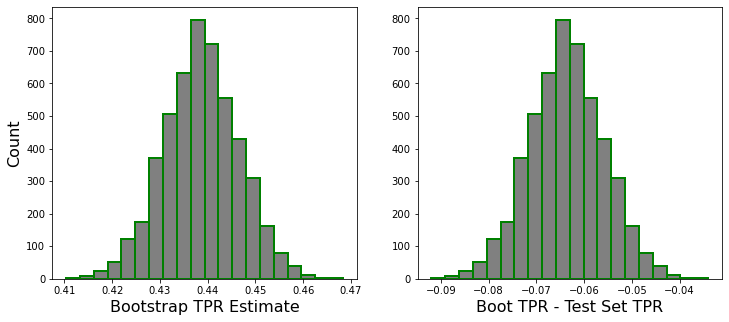

In [119]:
import matplotlib.pyplot as plt
true_positive = tpr(y_pred)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap TPR Estimate', fontsize=16)
axs[1].set_xlabel('Boot TPR - Test Set TPR', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,0]-true_positive, bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[1].set_xlim([-0.15,0.15])

(array([  3.,  11.,  29.,  65., 129., 254., 375., 574., 642., 779., 684.,
        563., 423., 231., 113.,  75.,  30.,  15.,   2.,   3.]),
 array([0.03336488, 0.03622811, 0.03909134, 0.04195457, 0.04481779,
        0.04768102, 0.05054425, 0.05340748, 0.05627071, 0.05913393,
        0.06199716, 0.06486039, 0.06772362, 0.07058684, 0.07345007,
        0.0763133 , 0.07917653, 0.08203975, 0.08490298, 0.08776621,
        0.09062944]),
 <BarContainer object of 20 artists>)

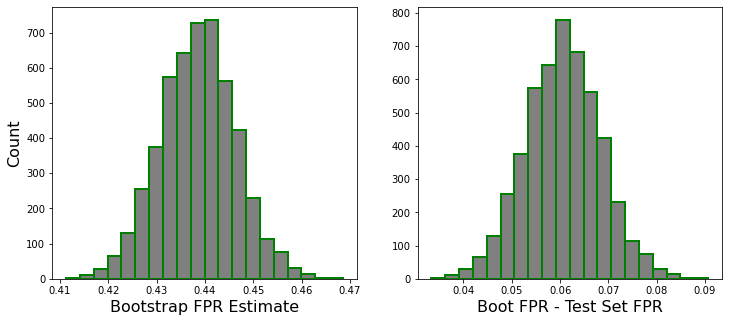

In [108]:
import matplotlib.pyplot as plt
false_positive = fpr(y_pred)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap FPR Estimate', fontsize=16)
axs[1].set_xlabel('Boot FPR - Test Set FPR', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,1]-false_positive, bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[1].set_xlim([-0.15,0.15])

(array([  3.,   4.,  24.,  52.,  96., 141., 287., 380., 620., 633., 651.,
        660., 509., 403., 245., 148.,  70.,  46.,  19.,   9.]),
 array([-0.08158565, -0.07971269, -0.07783974, -0.07596678, -0.07409383,
        -0.07222088, -0.07034792, -0.06847497, -0.06660201, -0.06472906,
        -0.0628561 , -0.06098315, -0.0591102 , -0.05723724, -0.05536429,
        -0.05349133, -0.05161838, -0.04974542, -0.04787247, -0.04599952,
        -0.04412656]),
 <BarContainer object of 20 artists>)

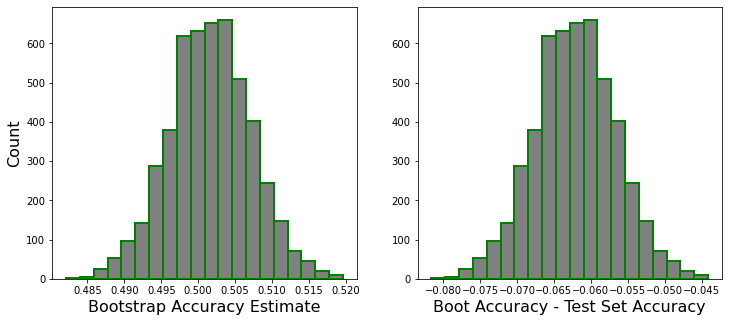

In [109]:
import matplotlib.pyplot as plt
accur = acc(y_pred)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,2], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,2]-accur, bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[1].set_xlim([-0.15,0.15])

In [102]:
# The 95% confidence interval
#CI= np.quantile(bs_output.iloc[:,0]-accur,np.array([0.025,0.975]))
CI= np.quantile(accur,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Accuracy is %s" % CI)

The 95-percent confidence interval of Accuracy is [0.56370469 0.56370469]


(array([  3.,   4.,  24.,  52.,  96., 141., 287., 380., 620., 633., 651.,
        660., 509., 403., 245., 148.,  70.,  46.,  19.,   9.]),
 array([-0.08158565, -0.07971269, -0.07783974, -0.07596678, -0.07409383,
        -0.07222088, -0.07034792, -0.06847497, -0.06660201, -0.06472906,
        -0.0628561 , -0.06098315, -0.0591102 , -0.05723724, -0.05536429,
        -0.05349133, -0.05161838, -0.04974542, -0.04787247, -0.04599952,
        -0.04412656]),
 <BarContainer object of 20 artists>)

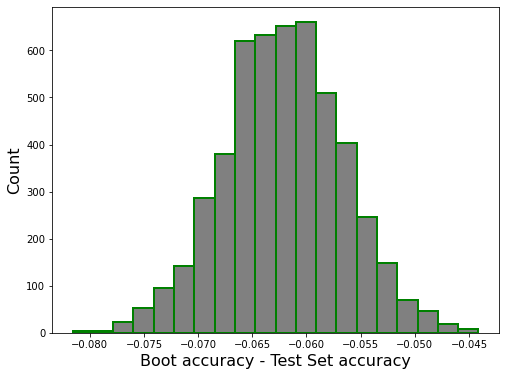

In [118]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot accuracy - Test Set accuracy', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,2]-accur, bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs.set_xlim([-0.15,0.15])
#axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
#axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

In [104]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,0]-true_positive,np.array([0.025,0.975]))
print("The 95-percent confidence interval of True Positive Rate is %s" % CI)

The 95-percent confidence interval of True Positive Rate is [-0.07904549 -0.04846508]


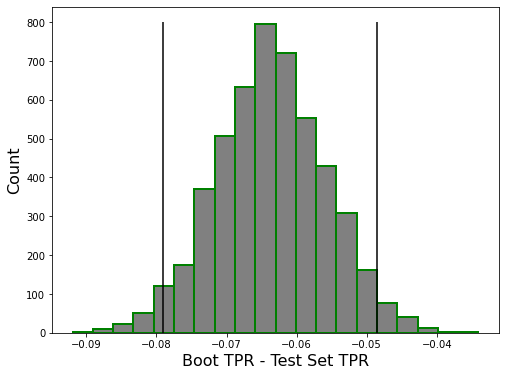

In [105]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot TPR - Test Set TPR', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0]-true_positive, bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

In [106]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,0]-false_positive,np.array([0.025,0.975]))
print("The 95-percent confidence interval of True Positive Rate is %s" % CI)

The 95-percent confidence interval of True Positive Rate is [0.04541721 0.07599762]


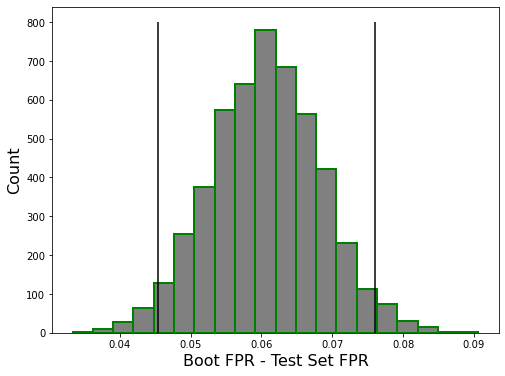

In [120]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot FPR - Test Set FPR', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,1]-false_positive, bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")